In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import librosa as lb
import pandas as pd
import glob
import os
import wave
from scipy.io import wavfile

In [3]:
path = r"C:\Users\Copo\source\repos\UrbanSoundClassification\Data\train"
def load_plot_rand_sample(datasetpath, label=0):
    """Load a .wav file from the dataset and displays it with the label
    
    Arguments:
    
    datasetpath : string, path to the training or testing set (must contain the train.csv file)
    """ 
    if not label:
        infos = pd.read_csv(os.path.join(datasetpath, "train.csv"))
        files = [y for x in os.walk(datasetpath) for y in glob.glob(os.path.join(x[0], '*.wav'))]
        index = np.random.randint(0,len(files)-1)
        print(index)
        print(files[index])
        data, sampling_rate = lb.load(files[index])
        label = infos.iloc[index].Class
    
    plt.plot(data)
    plt.title(label)
    plt.show()
    

In [58]:
import inspect
for a in inspect.getmembers(f):
    print(a)

('__class__', <class 'audioread.rawread.RawAudioFile'>)
('__delattr__', <method-wrapper '__delattr__' of RawAudioFile object at 0x0000023E0AAB7AC8>)
('__dict__', {'_fh': <_io.BufferedReader name='C:\\Users\\Copo\\source\\repos\\UrbanSoundClassification\\Data\\train\\Train\\559.wav'>, '_file': <wave.Wave_read object at 0x0000023E0AAB7160>, '_needs_byteswap': False})
('__dir__', <built-in method __dir__ of RawAudioFile object at 0x0000023E0AAB7AC8>)
('__doc__', 'An AIFF, WAV, or Au file that can be read by the Python standard\n    library modules ``wave``, ``aifc``, and ``sunau``.\n    ')
('__enter__', <bound method RawAudioFile.__enter__ of <audioread.rawread.RawAudioFile object at 0x0000023E0AAB7AC8>>)
('__eq__', <method-wrapper '__eq__' of RawAudioFile object at 0x0000023E0AAB7AC8>)
('__exit__', <bound method RawAudioFile.__exit__ of <audioread.rawread.RawAudioFile object at 0x0000023E0AAB7AC8>>)
('__format__', <built-in method __format__ of RawAudioFile object at 0x0000023E0AAB7AC8>)

# Dataset characterization
## Audio features statistics
Below I try loading each of the samples in the training set with audioread and build statistics about number of channels, samplerate and duration. Histograms of the results are shown.
#### IMPORTANT NOTE: some audio files will not load correctly if you have not installed ffmpeg before. 

In [60]:
#collect statistics on the train dataset
import audioread
channels = []
samplerates = []
durations = []
for filename in files:
    with audioread.audio_open(filename) as f:
        channels.append(f.channels)
        samplerates.append(f.samplerate)
        durations.append(f.duration) 


<Figure size 432x288 with 0 Axes>

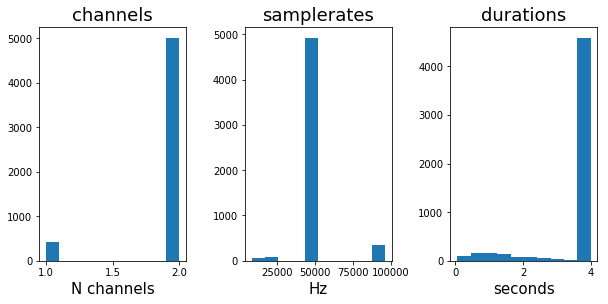

In [88]:
#plot the characteristics of the sounds in the dataset
stats = [channels, samplerates, durations]
labels = ['channels', 'samplerates', 'durations']
xlabels = ['N channels', 'Hz', 'seconds']
fig = plt.figure(figsize=(10,10))
k = -1
for stat in stats:
    k = k+1
    plt.subplot(1,3,k+1)
    plt.hist(stat,10)
    plt.title(labels[k], fontsize = 18)
    plt.xlabel(xlabels[k], fontsize = 15)
plt.subplots_adjust(top = 0.45, wspace = 0.4)
plt.show()

As we can see, there is variability in all the three sound characteristics unedr exhamination. We will make use of librosa and set some keywords arguments in the librosa.load() function in order to homogeneize the dataset. Librosa will automatically set the samplerate to 22050Hz and we will have to pass the 'mono' argument like such:

In [90]:
#example of how to load a sample with fixed nchannels
data, sr = lb.load(files[0], mono=True)

## Dataset labels distribution
Next, let's check wheter we have a similar number of audio examples for each of the classes we want to classifiy. To do that we first load the train.csv file as a pandas dataframe, then we look at the number of different counts for each label.

In [95]:
infos = pd.read_csv(os.path.join(path, "train.csv"))

In [96]:
infos[:10]

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
5,6,children_playing
6,10,street_music
7,11,drilling
8,12,gun_shot
9,15,dog_bark


different sound categories : 
air_conditioner, engine_idling, gun_shot, jackhammer, street_music, drilling, children_playing, dog_bark, siren, car_horn


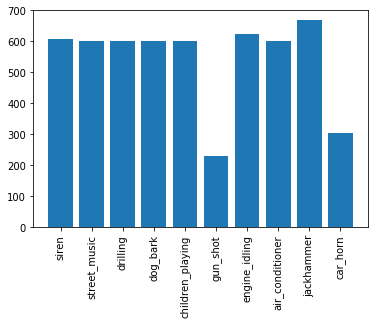

In [123]:
from collections import Counter

labels = ', '.join(list(set(infos['Class'])))
print(f'different sound categories : \n{labels}')

count_dict = Counter(infos['Class'])
Ns = []
for key, values in count_dict.items():
    Ns.append(values)
plt.bar(list(range(len(count_dict.keys()))), Ns,)
plt.xticks(range(len(count_dict.keys())),  count_dict.keys(), rotation='vertical')

plt.show()

In [109]:
n

Counter({'siren': 607,
         'street_music': 600,
         'drilling': 600,
         'dog_bark': 600,
         'children_playing': 600,
         'gun_shot': 230,
         'engine_idling': 624,
         'air_conditioner': 600,
         'jackhammer': 668,
         'car_horn': 306})

In [15]:
datasetpath = r"C:\Users\Copo\source\repos\UrbanSoundClassification\Data\train"

files = [y for x in os.walk(datasetpath) for y in glob.glob(os.path.join(x[0], '*.wav'))]
bad_files = []
for f in files:
    try:
        data, sampling_rate = wavfile.read(f)
    except:
        print('a')
        bad_files.append(f)


a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [34]:
datasetpath = r"C:\Users\Copo\source\repos\UrbanSoundClassification\Data\test"
import wave
files_test = [y for x in os.walk(datasetpath) for y in glob.glob(os.path.join(x[0], '*.wav'))]
bad_files_test = []
bad_files_test_wave = []
for f in files_test:
    try:
        
        data, sampling_rate = wave.open(f)
    except:
        print('a')
        bad_files_test_wave.append(f)


a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a
a


In [32]:
wave.open(files[0])

In [16]:
len(bad_files)/len(files)

0.3030358785648574

In [16]:
len(bad_files)/len(files)

0.3030358785648574

In [35]:
len(bad_files_test_wave)/len(files_test)

1.0

In [20]:
len(bad_files_test)/len(files_test)

0.33818622990597513

In [22]:
infos = pd.read_csv(os.path.join(datasetpath, "test.csv"))

In [23]:
len(infos)

3297

In [24]:
len(files_test)

3297

In [25]:
infos

,ID
0,5
1,7
2,8
3,9
4,13
5,14
6,16
7,21
8,23
9,25
